In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset_dir = r"C:\Users\ADMIN\Desktop\github projects\ml-project\PlantVillage"
classes = ['Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Pepper__bell___healthy']

In [3]:
image_size = (128, 128)  
k_values = [3, 5, 7]  

In [4]:
def load_images(dataset_dir, classes, image_size):
    images, labels = [], []
    for class_name in classes:
        class_dir = os.path.join(dataset_dir, class_name)
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            try:
                with Image.open(img_path) as img:
                    img = img.resize(image_size).convert('RGB')  
                    img_array = np.asarray(img, dtype=np.float32) / 255.0 
                    images.append(img_array)
                    labels.append(class_name)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    return np.array(images), np.array(labels)


In [5]:
images, labels = load_images(dataset_dir, classes, image_size)
X = images.reshape(images.shape[0], -1)  
lb = LabelBinarizer()
y = lb.fit_transform(labels)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)  
#X_test = scaler.transform(X_test)

In [8]:
losses = []
accuracies = []
iterations = [10, 50, 100, 200, 500, 1000]

for max_iter in iterations:
    lr_model = LogisticRegression(max_iter=max_iter, solver='lbfgs', random_state=42)
    lr_model.fit(X_train, np.argmax(y_train, axis=1))
    y_pred_lr = lr_model.predict(X_test)
    
    acc = accuracy_score(np.argmax(y_test, axis=1), y_pred_lr)
    losses.append(lr_model.n_iter_[0])  # Approximate "loss"
    accuracies.append(acc)
    
    print(f"Max Iterations = {max_iter}, Accuracy = {acc:.2f}")
    print(classification_report(np.argmax(y_test, axis=1), y_pred_lr, target_names=classes))


Max Iterations = 10, Accuracy = 0.67
                        precision    recall  f1-score   support

        Tomato_healthy       0.68      0.86      0.76       298
   Tomato_Early_blight       0.47      0.38      0.42       185
    Tomato_Late_blight       0.61      0.57      0.59       368
Pepper__bell___healthy       0.80      0.75      0.78       345

              accuracy                           0.67      1196
             macro avg       0.64      0.64      0.64      1196
          weighted avg       0.66      0.67      0.66      1196

Max Iterations = 50, Accuracy = 0.79
                        precision    recall  f1-score   support

        Tomato_healthy       0.83      0.91      0.87       298
   Tomato_Early_blight       0.61      0.54      0.57       185
    Tomato_Late_blight       0.75      0.72      0.74       368
Pepper__bell___healthy       0.88      0.91      0.89       345

              accuracy                           0.79      1196
             macro avg   

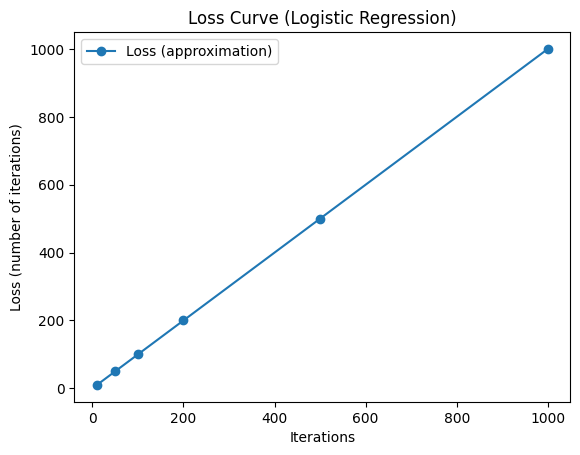

In [9]:
plt.figure()
plt.plot(iterations, losses, marker='o', label='Loss (approximation)')
plt.title("Loss Curve (Logistic Regression)")
plt.xlabel("Iterations")
plt.ylabel("Loss (number of iterations)")
plt.legend()
plt.show()

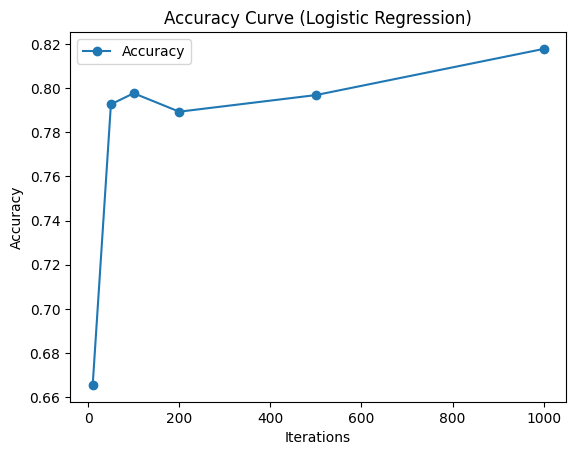

In [10]:
plt.figure()
plt.plot(iterations, accuracies, marker='o', label='Accuracy')
plt.title("Accuracy Curve (Logistic Regression)")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

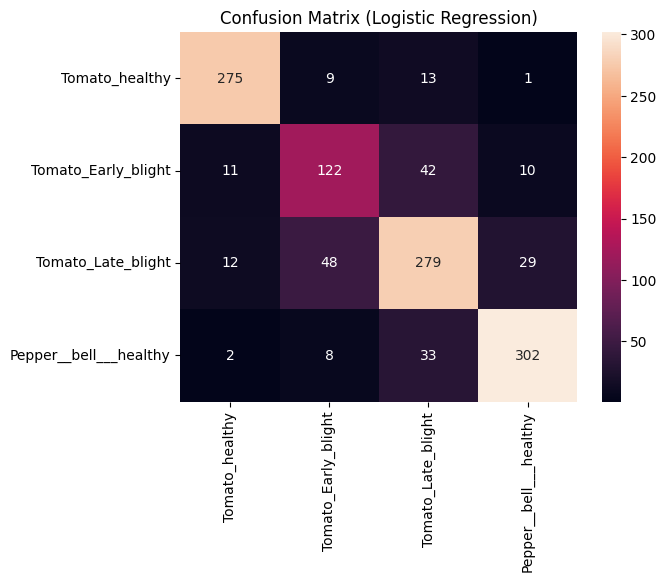

In [11]:
y_pred_lr = lr_model.predict(X_test)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

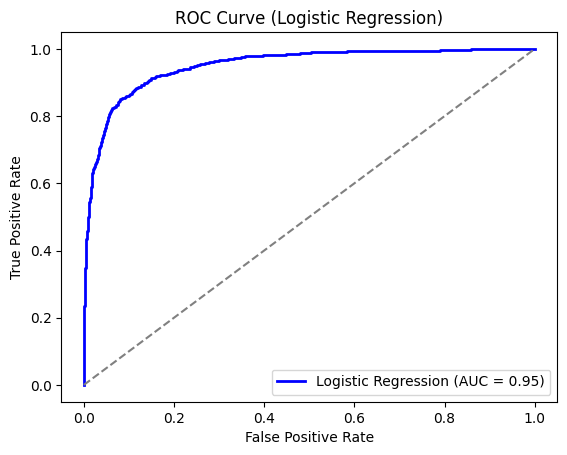

In [12]:
y_score = lr_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve (Logistic Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

KNN (k=3) Accuracy: 0.74
                        precision    recall  f1-score   support

        Tomato_healthy       0.76      0.94      0.84       298
   Tomato_Early_blight       0.61      0.55      0.58       185
    Tomato_Late_blight       0.71      0.62      0.66       368
Pepper__bell___healthy       0.80      0.78      0.79       345

              accuracy                           0.74      1196
             macro avg       0.72      0.72      0.72      1196
          weighted avg       0.73      0.74      0.73      1196



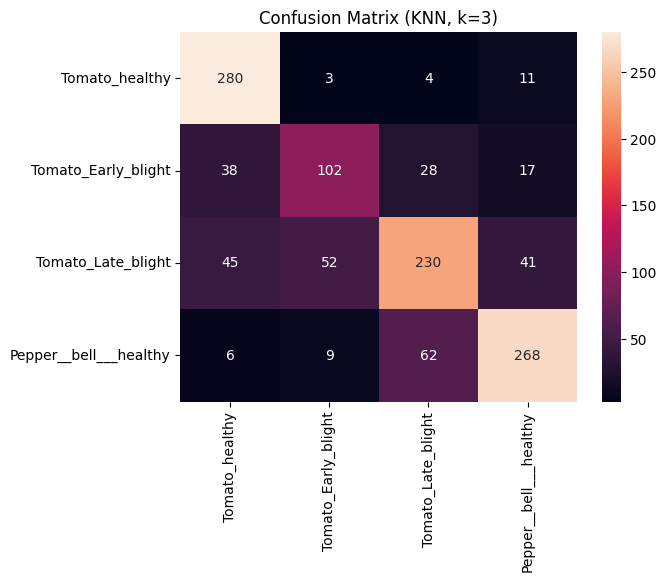

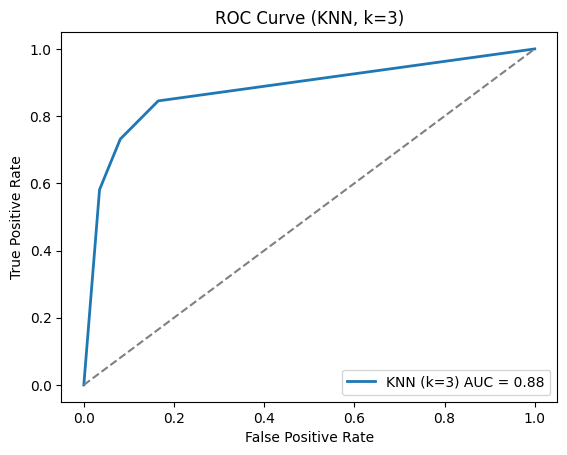

KNN (k=5) Accuracy: 0.73
                        precision    recall  f1-score   support

        Tomato_healthy       0.77      0.92      0.84       298
   Tomato_Early_blight       0.58      0.54      0.56       185
    Tomato_Late_blight       0.70      0.62      0.66       368
Pepper__bell___healthy       0.79      0.79      0.79       345

              accuracy                           0.73      1196
             macro avg       0.71      0.72      0.71      1196
          weighted avg       0.73      0.73      0.73      1196



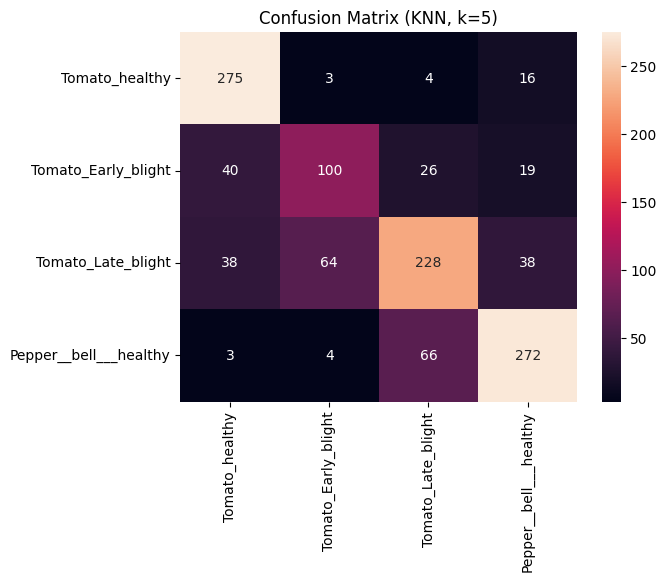

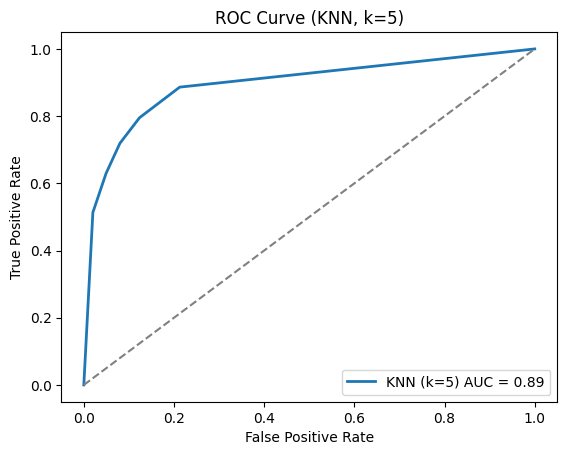

KNN (k=7) Accuracy: 0.72
                        precision    recall  f1-score   support

        Tomato_healthy       0.76      0.90      0.82       298
   Tomato_Early_blight       0.60      0.54      0.57       185
    Tomato_Late_blight       0.68      0.60      0.64       368
Pepper__bell___healthy       0.76      0.78      0.77       345

              accuracy                           0.72      1196
             macro avg       0.70      0.70      0.70      1196
          weighted avg       0.71      0.72      0.71      1196



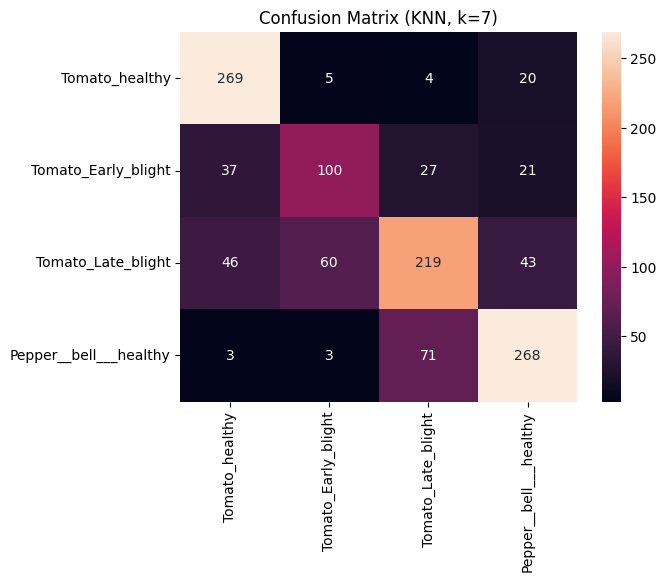

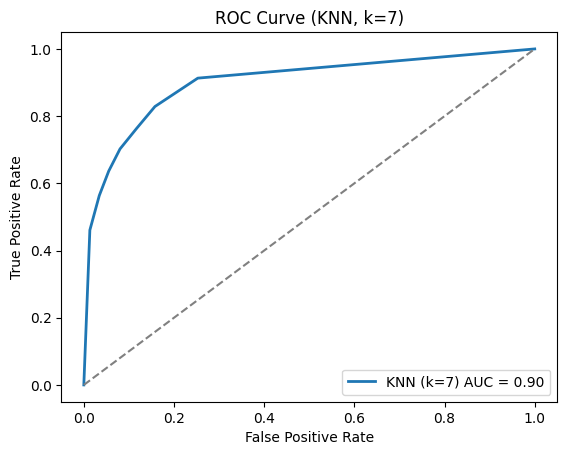

In [13]:
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, np.argmax(y_train, axis=1))
    y_pred_knn = knn_model.predict(X_test)
    
    acc_knn = accuracy_score(np.argmax(y_test, axis=1), y_pred_knn)
    print(f"KNN (k={k}) Accuracy: {acc_knn:.2f}")
    print(classification_report(np.argmax(y_test, axis=1), y_pred_knn, target_names=classes))
    
    # Confusion Matrix for KNN
    conf_matrix_knn = confusion_matrix(np.argmax(y_test, axis=1), y_pred_knn)
    sns.heatmap(conf_matrix_knn, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title(f"Confusion Matrix (KNN, k={k})")
    plt.show()

    # ROC and AUC for KNN
    y_score_knn = knn_model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_score_knn.ravel())
    roc_auc_knn = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, lw=2, label=f'KNN (k={k}) AUC = {roc_auc_knn:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve (KNN, k={k})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()